In [1]:
from Controller import *
from hwcomponents import *

In [2]:
test_settings = VortexSetings(
    amount_neurons=10,
    amount_synapses=10,
    amount_samples=50,
    neuron=Neurons.LIF()
)

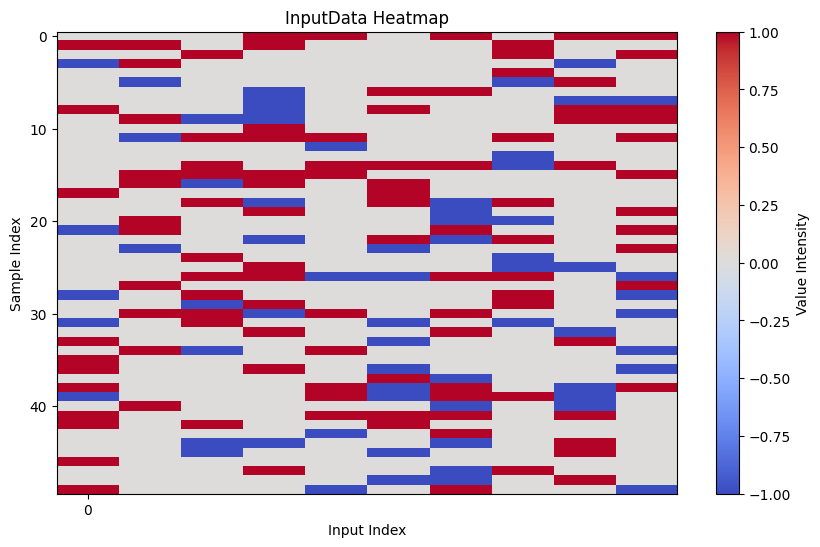

In [3]:
# Print input data
Utils.Plotting.input_data_as_heatmap(test_settings.InputData)

In [4]:
Controller = VortexOne(test_settings)

In [5]:
Controller.neurons

BRAM_Neuron(neurons=[Neuron For Memory(leak_str=8.0, threshold=14.0, reset=4.0, core=0), Neuron For Memory(leak_str=7.0, threshold=15.0, reset=3.0, core=0), Neuron For Memory(leak_str=10.0, threshold=15.0, reset=5.0, core=0), Neuron For Memory(leak_str=9.0, threshold=21.0, reset=5.0, core=0), Neuron For Memory(leak_str=12.0, threshold=16.0, reset=5.0, core=0), Neuron For Memory(leak_str=7.0, threshold=20.0, reset=5.0, core=0), Neuron For Memory(leak_str=10.0, threshold=10.0, reset=3.0, core=0), Neuron For Memory(leak_str=10.0, threshold=19.0, reset=4.0, core=0), Neuron For Memory(leak_str=7.0, threshold=13.0, reset=4.0, core=0), Neuron For Memory(leak_str=9.0, threshold=17.0, reset=4.0, core=0)])

In [6]:
Controller.synapses

BRAM_synaptic_weights(synapses=[Synapse For Memory(length=10, weights=[0 1 0 0 2 2 2 0 1 3]), Synapse For Memory(length=10, weights=[1 0 0 0 1 1 0 1 0 0]), Synapse For Memory(length=10, weights=[0 1 0 1 1 0 0 1 0 0]), Synapse For Memory(length=10, weights=[0 2 0 2 0 0 0 0 1 1]), Synapse For Memory(length=10, weights=[0 2 0 0 1 0 1 2 0 3]), Synapse For Memory(length=10, weights=[0 1 0 0 0 0 0 0 2 0]), Synapse For Memory(length=10, weights=[1 0 1 2 2 1 2 1 1 1]), Synapse For Memory(length=10, weights=[1 2 1 1 1 2 1 0 3 0]), Synapse For Memory(length=10, weights=[0 2 2 3 0 0 2 1 1 0]), Synapse For Memory(length=10, weights=[0 0 1 0 0 0 0 0 0 0])])

In [7]:
for neuron in Controller.neurons:
    print(neuron)

Neuron For Memory(leak_str=8.0, threshold=14.0, reset=4.0, core=0)
Neuron For Memory(leak_str=7.0, threshold=15.0, reset=3.0, core=0)
Neuron For Memory(leak_str=10.0, threshold=15.0, reset=5.0, core=0)
Neuron For Memory(leak_str=9.0, threshold=21.0, reset=5.0, core=0)
Neuron For Memory(leak_str=12.0, threshold=16.0, reset=5.0, core=0)
Neuron For Memory(leak_str=7.0, threshold=20.0, reset=5.0, core=0)
Neuron For Memory(leak_str=10.0, threshold=10.0, reset=3.0, core=0)
Neuron For Memory(leak_str=10.0, threshold=19.0, reset=4.0, core=0)
Neuron For Memory(leak_str=7.0, threshold=13.0, reset=4.0, core=0)
Neuron For Memory(leak_str=9.0, threshold=17.0, reset=4.0, core=0)


In [8]:
Controller.simulate()

In [9]:
for neuron in Controller.neurons:
    print(neuron)

Neuron For Memory(leak_str=8.0, threshold=14.0, reset=4.0, core=0.0)
Neuron For Memory(leak_str=7.0, threshold=15.0, reset=3.0, core=4.0)
Neuron For Memory(leak_str=10.0, threshold=15.0, reset=5.0, core=12.0)
Neuron For Memory(leak_str=9.0, threshold=21.0, reset=5.0, core=17.0)
Neuron For Memory(leak_str=12.0, threshold=16.0, reset=5.0, core=11.0)
Neuron For Memory(leak_str=7.0, threshold=20.0, reset=5.0, core=14.0)
Neuron For Memory(leak_str=10.0, threshold=10.0, reset=3.0, core=4.0)
Neuron For Memory(leak_str=10.0, threshold=19.0, reset=4.0, core=6.0)
Neuron For Memory(leak_str=7.0, threshold=13.0, reset=4.0, core=8.0)
Neuron For Memory(leak_str=9.0, threshold=17.0, reset=4.0, core=5.0)


In [10]:
log = np.array(Controller.log)
log.shape


(50, 10, 2)

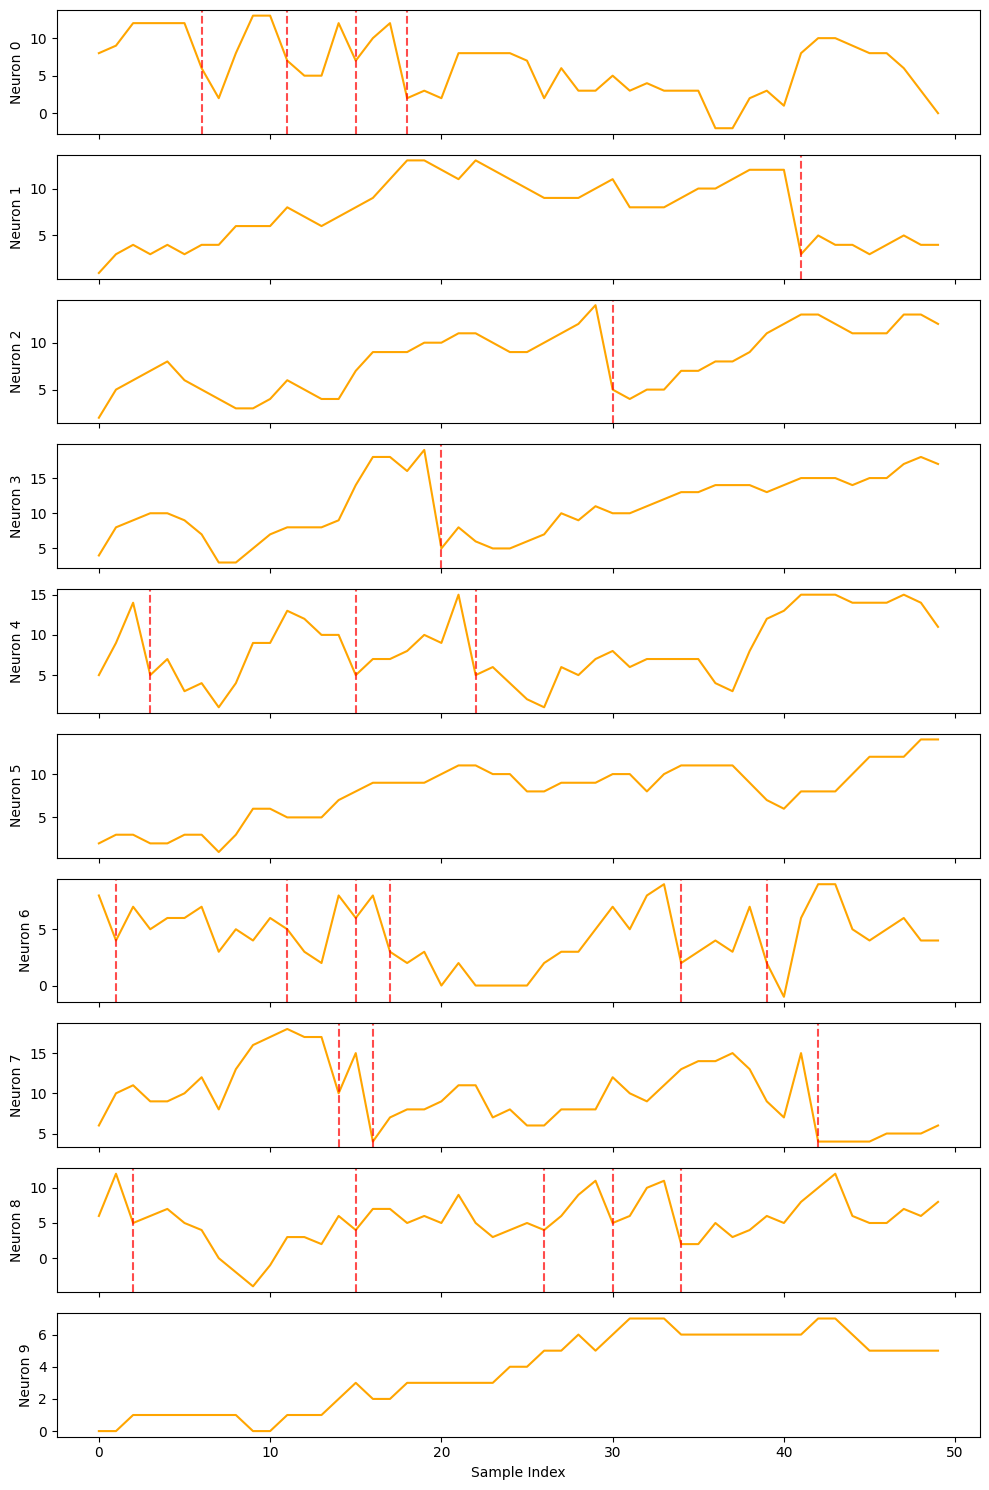

In [11]:
data = log

# Create the figure and axes
fig, axes = plt.subplots(10, 1, figsize=(10, 15), sharex=True)

# Plot each core's values over time and add spike event markers
for i in range(10):
    axes[i].plot(data[:, i, 0], color='orange')
    
    # Add vertical lines for spike events
    spike_indices = np.where(data[:, i, 1] == 1)[0]
    for idx in spike_indices:
        axes[i].axvline(x=idx, color='red', linestyle='--', alpha=0.7)
    
    axes[i].set_ylabel(f"Neuron {i}")

axes[-1].set_xlabel("Sample Index")

# Adjust layout for readability
plt.tight_layout()
plt.show()


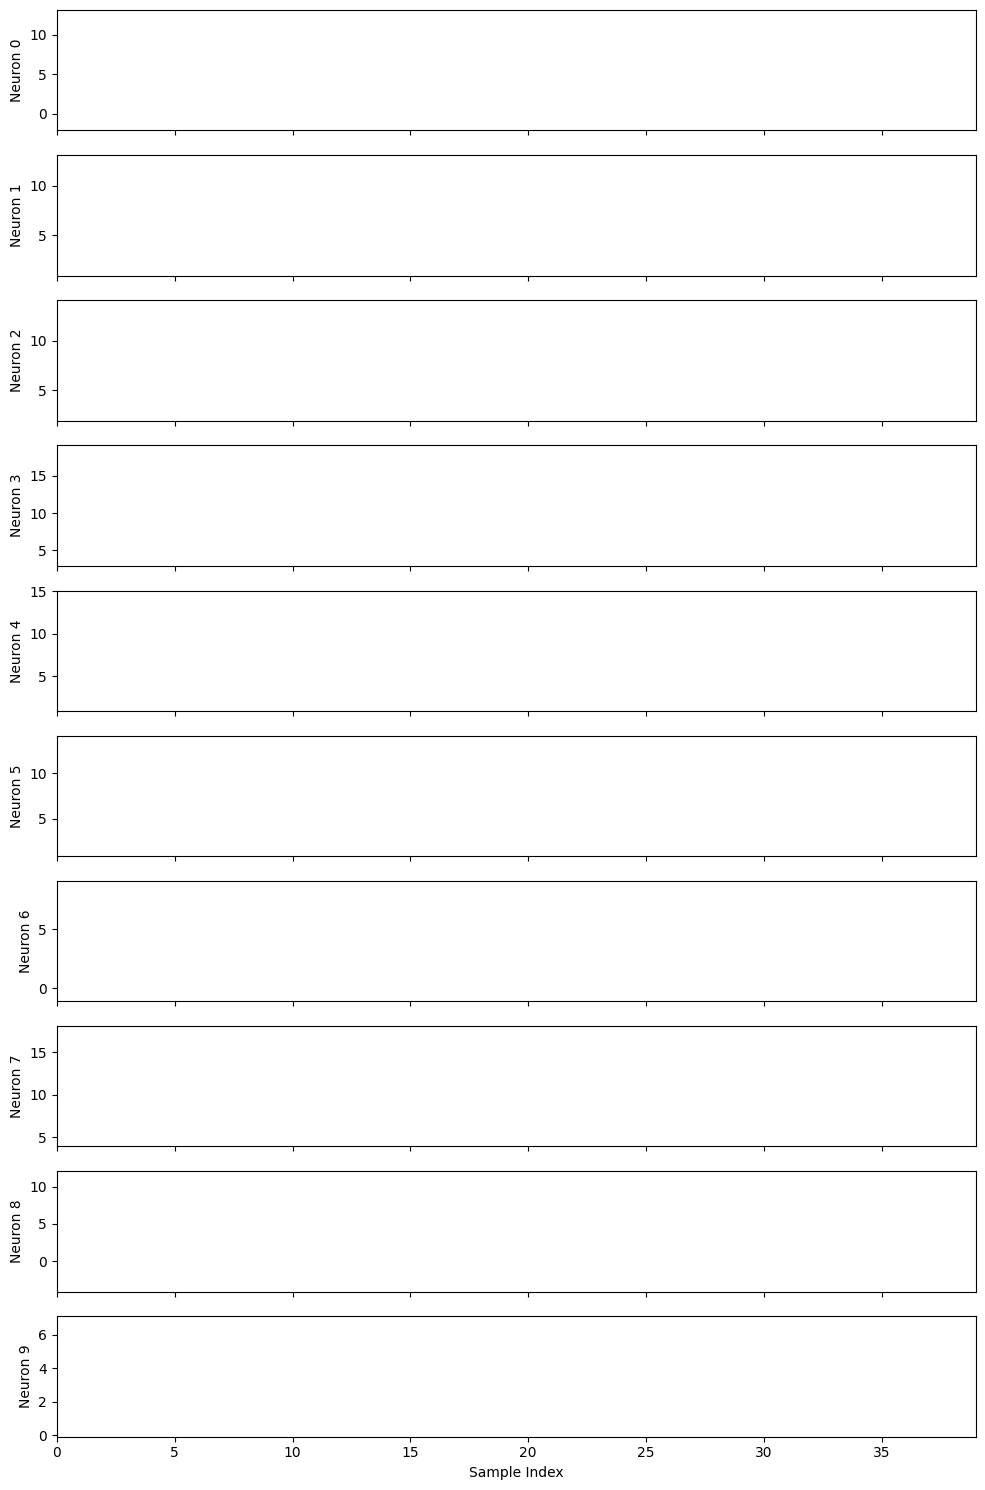

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Assume 'data' is already defined and has shape (40, 10, 2)

# Enable inline plotting with animation support
%matplotlib inline
from IPython.display import HTML

# Create figure and axes for animation
fig, axes = plt.subplots(10, 1, figsize=(10, 15), sharex=True)
lines = []

# Initialize plot lines
for i in range(10):
    line, = axes[i].plot([], [], color='orange')
    lines.append(line)
    axes[i].set_xlim(0, 39)  # Fixed x-axis range for 40 data points
    axes[i].set_ylim(data[:, i, 0].min() - 0.1, data[:, i, 0].max() + 0.1)
    axes[i].set_ylabel(f"Neuron {i}")

axes[-1].set_xlabel("Sample Index")
plt.tight_layout()

# Animation update function
def update(frame):
    # First update all the lines
    for i in range(10):
        lines[i].set_data(np.arange(frame + 1), data[:frame + 1, i, 0])
    
    # Clear old spike markers and add new ones for the current frame
    for i, ax in enumerate(axes):
        # Remove all vertical lines (spike markers)
        for line in ax.lines[1:]:  # Skip the first line which is the data plot
            line.remove()
            
        # Add new spike markers up to current frame
        spike_indices = np.where(data[:frame + 1, i, 1] == 1)[0]
        for idx in spike_indices:
            ax.axvline(x=idx, color='red', linestyle='--', alpha=0.7)
    
    return lines

# Create animation
anim = animation.FuncAnimation(
    fig, 
    update, 
    frames=40, 
    interval=200, 
    blit=False
)

# Display animation in the notebook
HTML(anim.to_jshtml())

In [13]:
anim.save('core_animation.gif', writer='pillow', fps=5)